In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("winequality-red.csv")
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [5]:
df.shape

(1599, 12)

In [6]:

df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
# Basic Information about the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [9]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [10]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

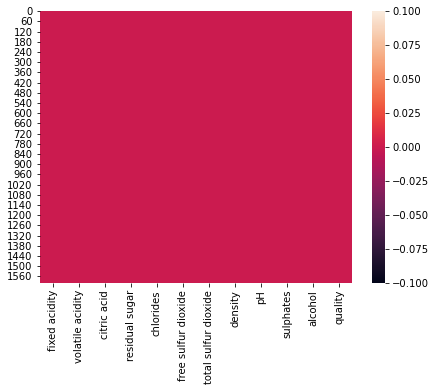

In [11]:
plt.figure(figsize=(7,5))
sns.heatmap(df.isnull())

<AxesSubplot:>

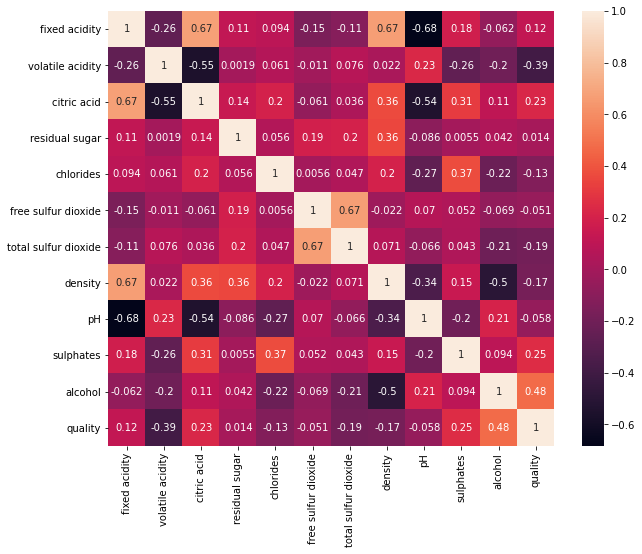

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

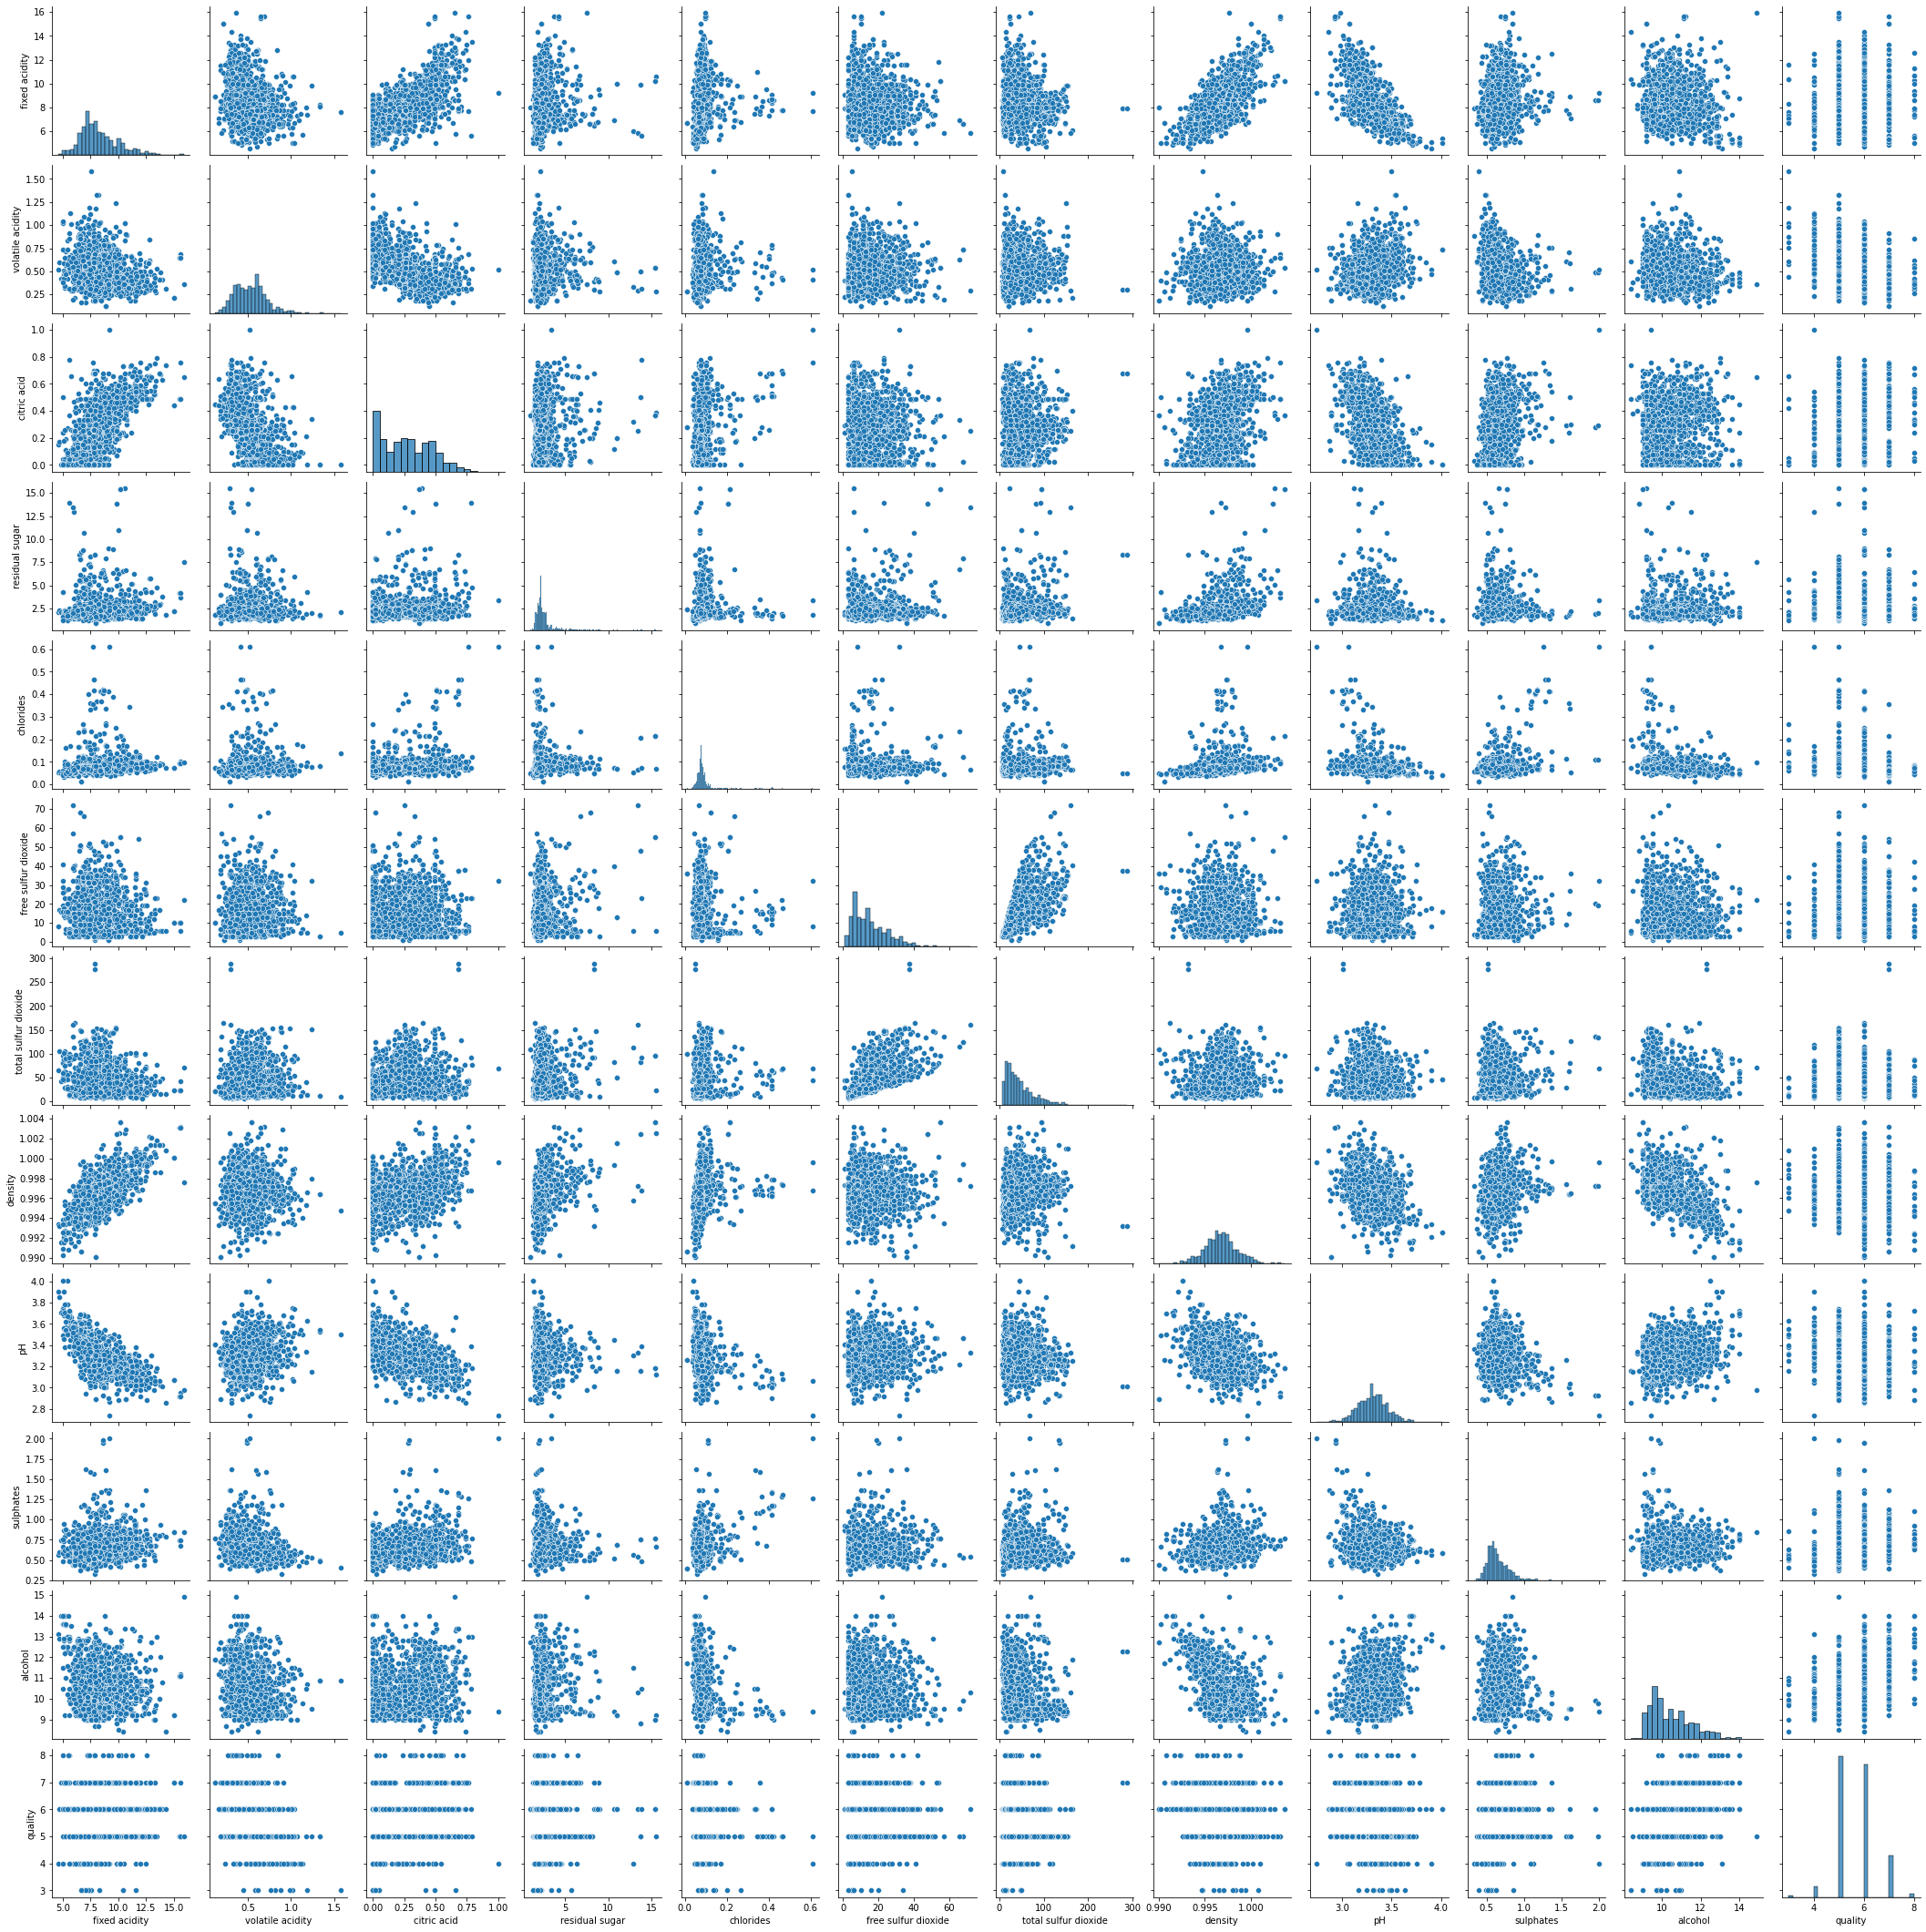

In [13]:
sns.pairplot(df)

In [14]:
px.scatter(df, x='free sulfur dioxide',y='total sulfur dioxide', color=df['quality'])

In [15]:
diag = px.density_heatmap(df, x="alcohol", y="quality", nbinsx=25, nbinsy=10, color_continuous_scale="thermal")
diag.show()

In [16]:
diag = px.pie(df, values='quality', names='quality', hole=0.5)
diag.show()

In [17]:
labels = df['quality'].unique()
values = df['quality'].value_counts()

# pull is given as a fraction of the pie radius
diag = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.1, 0.2, 0.2, 0.2])])
diag.show()

In [18]:
diag = px.histogram(df, x="citric acid", color="quality",marginal="violin")
diag.update_traces(opacity=.90)
diag.show()

In [19]:
diag = px.histogram(df, x="sulphates", color="quality",marginal="violin")
diag.update_traces(opacity=.90)
diag.show()

In [20]:
diag = px.histogram(df, x="pH", color="quality",marginal="violin")
diag.update_traces(opacity=.90)
diag.show()

In [21]:
diag = px.density_contour(df, x="pH", color="quality")
diag.update_traces(opacity=0.90)
diag.show()

In [22]:
diag = px.histogram(df, x="volatile acidity", color="quality")
diag.update_traces(opacity=0.90)
diag.show()

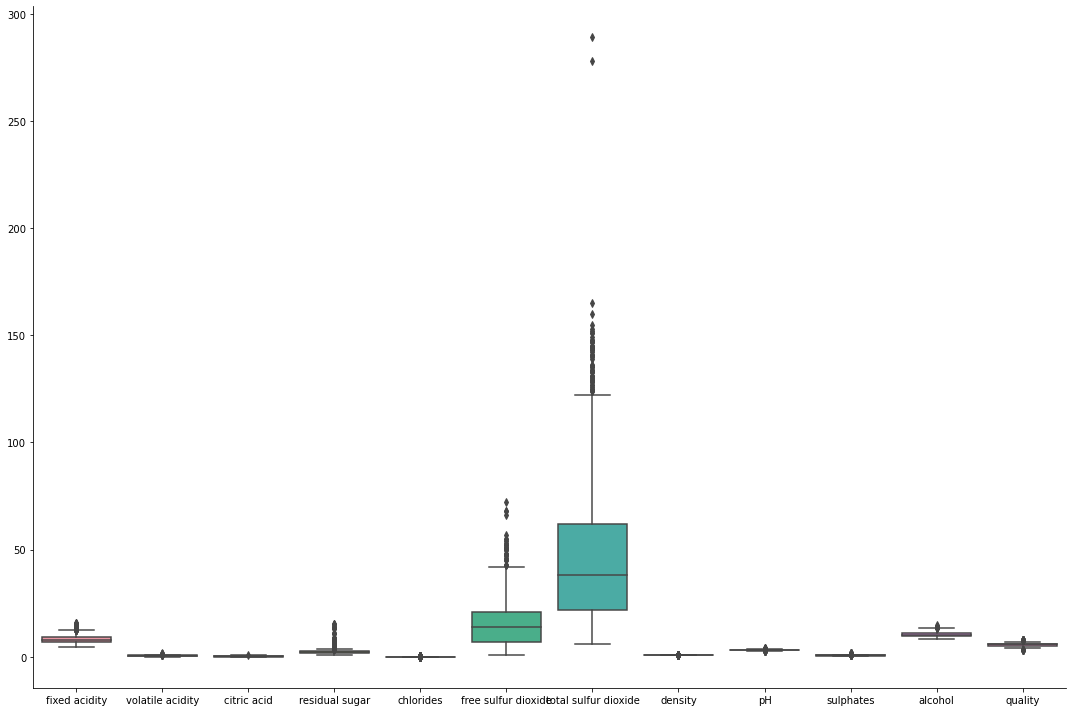

In [23]:
sns.factorplot(data=df, kind='box', size=10, aspect=1.5)

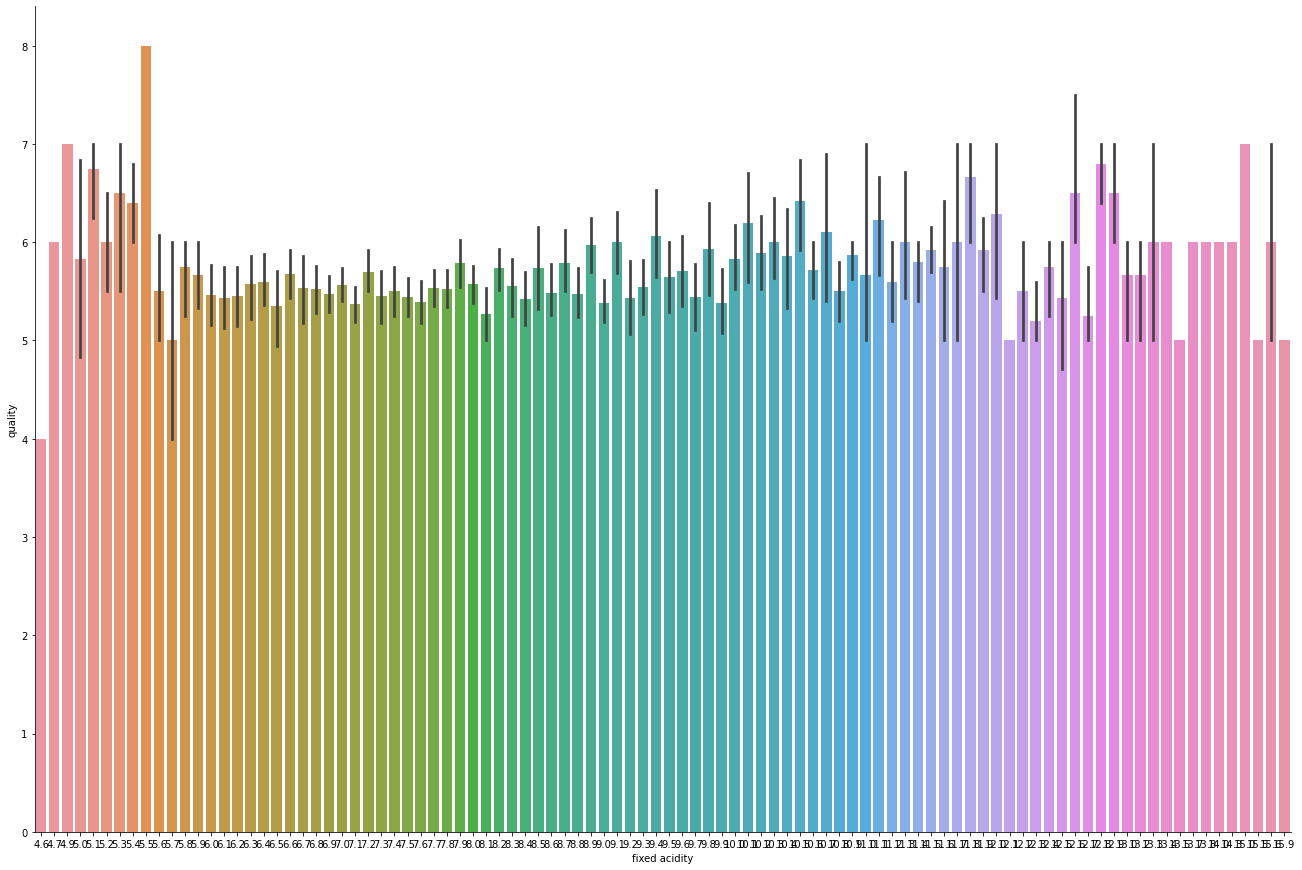

In [24]:
sns.factorplot(x=df['fixed acidity'], y=df['quality'], data=df,
                   kind='bar', size=12, aspect=1.5)

In [25]:
diag = px.violin(df, x="volatile acidity",  color="quality")
diag.update_traces(opacity=0.90)
diag.show()

In [26]:
bins = (2, 6.5, 8)
group_names = ['not good', 'good']
df['quality'] = pd.cut(df['quality'], bins=bins, labels=group_names)

In [27]:
from sklearn.preprocessing import LabelEncoder

label_encod = LabelEncoder()

In [28]:
df.quality = label_encod.fit_transform(df.quality)


In [29]:
X = df.drop('quality', axis=1)
y = df.quality

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
# Creating object of the model

model_dt = DecisionTreeClassifier(max_depth=4, random_state=42)

In [34]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [35]:
pred_dt = model_dt.predict(X_test)

In [36]:
dt  = round(accuracy_score(y_test, pred_dt)*100, 2)
print(dt) 

86.17


In [37]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.54      0.38      0.44        77
           1       0.90      0.94      0.92       451

    accuracy                           0.86       528
   macro avg       0.72      0.66      0.68       528
weighted avg       0.85      0.86      0.85       528



In [38]:
print(classification_report(y_test, pred_dt))


              precision    recall  f1-score   support

           0       0.54      0.38      0.44        77
           1       0.90      0.94      0.92       451

    accuracy                           0.86       528
   macro avg       0.72      0.66      0.68       528
weighted avg       0.85      0.86      0.85       528



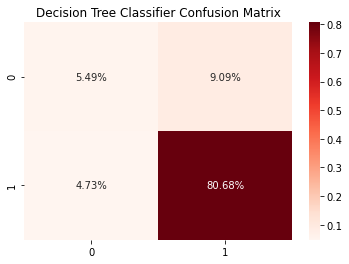

In [39]:
# confusion Maxtrix
cm2 = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.title("Decision Tree Classifier Confusion Matrix",fontsize=12)
plt.show()

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
model_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)

In [42]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=0.16, n_estimators=300, random_state=42)

In [43]:
pred_rf = model_rf.predict(X_test)

In [44]:
# Calculating Accuracy Score
rf = round(accuracy_score(y_test, pred_rf)*100, 2)
print(rf)

85.42


In [45]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.85      1.00      0.92       451

    accuracy                           0.85       528
   macro avg       0.43      0.50      0.46       528
weighted avg       0.73      0.85      0.79       528



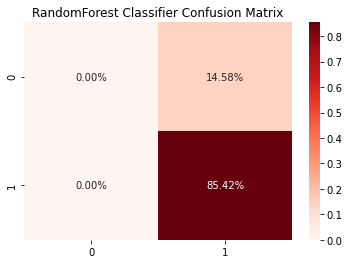

In [46]:
# confusion Maxtrix
cm3 = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.title("RandomForest Classifier Confusion Matrix",fontsize=12)
plt.show()

In [47]:
from xgboost import XGBClassifier

In [48]:
model_xgb = XGBClassifier(max_depth= 8, n_estimators= 125, random_state= 0,  learning_rate= 0.03, n_jobs=5)

In [49]:
model_xgb.fit(X_train, y_train)

[13:49:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=125, n_jobs=5, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
pred_xgb = model_xgb.predict(X_test)

In [51]:
# Calculating Accuracy Score

xgb = round(accuracy_score(y_test, pred_xgb)*100, 2)
print(xgb)

87.69


In [52]:
print(classification_report(y_test,pred_xgb))

              precision    recall  f1-score   support

           0       0.61      0.43      0.50        77
           1       0.91      0.95      0.93       451

    accuracy                           0.88       528
   macro avg       0.76      0.69      0.72       528
weighted avg       0.86      0.88      0.87       528



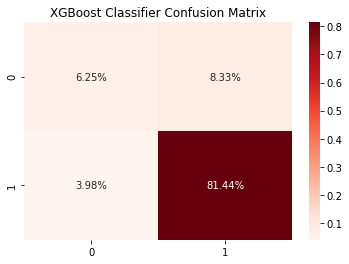

In [53]:
cm4 = confusion_matrix(y_test, pred_xgb)
sns.heatmap(cm4/np.sum(cm4), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.title("XGBoost Classifier Confusion Matrix",fontsize=12)
plt.show()

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
# Creating model object
model_kn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)

In [56]:
model_kn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=9)

In [57]:
pred_kn = model_kn.predict(X_test)

In [58]:
kn = round(accuracy_score(y_test, pred_kn)*100, 2)
print(kn)

84.47


In [59]:
print(classification_report(y_test,pred_kn))

              precision    recall  f1-score   support

           0       0.33      0.06      0.11        77
           1       0.86      0.98      0.91       451

    accuracy                           0.84       528
   macro avg       0.60      0.52      0.51       528
weighted avg       0.78      0.84      0.80       528



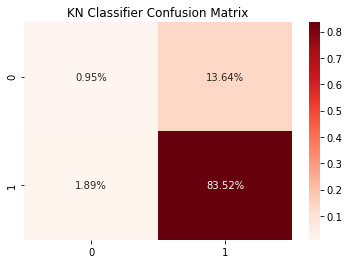

In [60]:
cm5 = confusion_matrix(y_test, pred_kn)
sns.heatmap(cm5/np.sum(cm5), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.title("KN Classifier Confusion Matrix",fontsize=12)
plt.show()

In [61]:
from sklearn.svm import SVC, LinearSVC

In [62]:
model_svm = SVC(kernel='rbf', random_state = 42)

In [63]:
model_svm.fit(X_train, y_train)

SVC(random_state=42)

In [64]:
pred_svm = model_svm.predict(X_test)

In [65]:
sv = round(accuracy_score(y_test, pred_svm)*100, 2)
print(sv)

85.61


In [66]:
print(classification_report(y_test,pred_kn))

              precision    recall  f1-score   support

           0       0.33      0.06      0.11        77
           1       0.86      0.98      0.91       451

    accuracy                           0.84       528
   macro avg       0.60      0.52      0.51       528
weighted avg       0.78      0.84      0.80       528



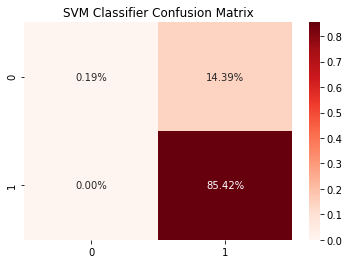

In [67]:
cm6 = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm6/np.sum(cm6), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.title("SVM Classifier Confusion Matrix",fontsize=12)
plt.show()

In [68]:
from sklearn.ensemble import AdaBoostClassifier

In [69]:
model_ada = AdaBoostClassifier(learning_rate= 0.002,n_estimators= 205,random_state=42)

In [70]:
model_ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.002, n_estimators=205, random_state=42)

In [72]:
pred_ada = model_ada.predict(X_test)
ada = round(accuracy_score(y_test, pred_ada)*100, 2)
print(ada)

85.42


In [73]:
print(classification_report(y_test,pred_ada))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.85      1.00      0.92       451

    accuracy                           0.85       528
   macro avg       0.43      0.50      0.46       528
weighted avg       0.73      0.85      0.79       528

